In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
Raw_Data =pd.read_csv('survey.csv')
Raw_Data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
mental_health_consequence_yes=Raw_Data[Raw_Data['mental_health_consequence'].str.contains("Yes")]
mental_health_consequence_yes.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
12,8/27/2014 11:33,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
25,8/27/2014 11:37,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
29,8/27/2014 11:38,37,Male,United Kingdom,NaN,No,No,No,Sometimes,25-Jun,...,Very difficult,Yes,Maybe,Some of them,No,No,Maybe,No,No,NaN
30,8/27/2014 11:39,32,Male,United Kingdom,NaN,No,No,No,Never,25-Jun,...,Don't know,Yes,Yes,Some of them,Some of them,No,Maybe,No,No,NaN


In [11]:
selectlocation_mentalhealth =mental_health_consequence_yes.groupby(['Country'])['anonymity'].count().reset_index(name="count")
selectlocation_mentalhealth .sort_values("count", axis=0, ascending = False)
selectlocation_mentalhealth .head(100)

,Country,count
0,Australia,8
1,"Bahamas, The",1
2,Belgium,2
3,Bulgaria,1
4,Canada,16
5,Colombia,1
6,Croatia,1
7,Finland,2
8,France,1
9,Georgia,1


In [13]:
mental_health_consequence_Unitedstate=mental_health_consequence_yes[mental_health_consequence_yes['Country'].str.contains("United States")]
mental_health_consequence_Unitedstate.head(150)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
12,8/27/2014 11:33,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
25,8/27/2014 11:37,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
31,8/27/2014 11:38,31,Male,United States,PA,Yes,Yes,No,Rarely,5-Jan,...,Somewhat difficult,Yes,No,No,No,No,No,No,Yes,NaN
41,8/27/2014 11:42,35,Male,United States,MI,No,No,No,NaN,More than 1000,...,Somewhat difficult,Yes,Yes,Some of them,No,No,Maybe,Don't know,No,NaN
60,8/27/2014 11:48,44,Male,United States,IA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,Yes,NaN
65,8/27/2014 11:51,40,Male,United States,CA,No,Yes,No,Sometimes,More than 1000,...,Don't know,Yes,Maybe,Some of them,No,No,No,No,Yes,NaN
78,8/27/2014 11:59,32,Male,United States,UT,No,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,Some of them,No,No,Yes,No,No,NaN
84,8/27/2014 12:05,33,Male,United States,CA,No,Yes,No,Never,More than 1000,...,Don't know,Yes,No,No,No,No,Maybe,No,No,NaN
87,8/27/2014 12:10,34,female,United States,OR,No,Yes,Yes,Rarely,500-1000,...,Don't know,Yes,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
110,8/27/2014 12:29,22,Male,United States,NY,No,No,Yes,Sometimes,500-1000,...,Don't know,Yes,No,No,No,No,Yes,No,No,NaN


In [14]:
mental_health_consequence_Unitedstate=mental_health_consequence_Unitedstate.groupby(['family_history'])['family_history'].count().reset_index(name="count")
mental_health_consequence_Unitedstate.head(100)

,family_history,count
0,No,77
1,Yes,94


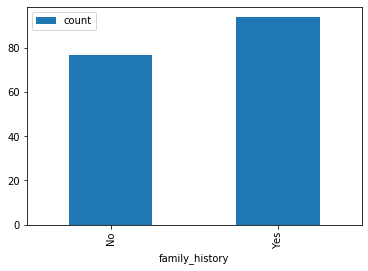

In [15]:
mental_health_consequence_Unitedstate.plot.bar(x='family_history')